In [2]:
!pip install requests
!pip install beautifulsoup4


In [10]:
import requests
from bs4 import BeautifulSoup

# URL of the website containing IPL scores
url="https://www.cricbuzz.com/cricket-series/ipl-2020/auction/completed"
get_url=requests.get(url)
soup=BeautifulSoup(get_url.text,"html.parser")



In [11]:
Name= [i.text for i in soup.findAll('div',{'class':'cb-font-18'})]
Sold_Unsold= [i.text for i in soup.findAll('div',{'class':'cb-col cb-col-20 cb-lst-itm-sm'})]

In [13]:
Base_Price= [i.text for i in soup.findAll('div',{'class':'cb-col cb-col-33 cb-lst-itm-sm text-left','class':'cb-font-16'})]
Base_Price=Base_Price[0:len(Base_Price)-3:3]
Base_Price=[i.replace('\xa0\xa0',' ') for i in Base_Price]
Final_Price= [i.text for i in soup.findAll('div',{'class':'cb-col cb-col-33 cb-lst-itm-sm text-left','class':'cb-font-16'})]
Final_Price=Final_Price[1:len(Final_Price)-3:3]
Final_Price=[i.replace('\xa0\xa0',' ') for i in Final_Price]
Sold_To= [i.text for i in soup.findAll('div',{'class':'cb-col cb-col-33 cb-lst-itm-sm text-left','class':'cb-font-16'})]
Sold_To=Sold_To[2:len(Sold_To)-3:3]
Sold_To=[i.replace('\xa0\xa0',' ') for i in Sold_To]


In [16]:
Role= [i.text for i in soup.findAll('div',{'class':'cb-col cb-col-80','class':'cb-font-12 text-gray'})]
Role=Role[0::4]
# Role=[i.split(' • ')[0] for i in Role]
Role

[' Bowler • India ',
 ' Bowler • West Indies ',
 ' Bowling Allrounder • Sri Lanka ',
 ' Bowling Allrounder • England ',
 ' Batsman • India ',
 ' WK-Batsman • India ',
 ' Batting Allrounder • India ',
 ' Bowler • Australia ',
 ' Bowler • South Africa ',
 ' Bowler • England ',
 ' Batting Allrounder • Australia ',
 ' Batting Allrounder • New Zealand ',
 ' Bowling Allrounder • Australia ',
 ' Bowler • India ',
 ' Bowler • India ',
 ' WK-Batsman • India ',
 ' WK-Batsman • India ',
 ' Bowling Allrounder • Australia ',
 ' Bowling Allrounder • India ',
 ' Batting Allrounder • India ',
 ' Batsman • India ',
 ' Bowler • India ',
 ' WK-Batsman • Sri Lanka ',
 ' Batting Allrounder • New Zealand ',
 ' Batsman • India ',
 ' Batting Allrounder • India ',
 ' Bowler • India ',
 ' Bowling Allrounder • India ',
 ' India ',
 ' Bowler • India ',
 ' Bowler • England ',
 ' Bowler • Australia ',
 ' Batsman • India ',
 ' Batsman • India ',
 ' India ',
 ' Bowler • India ',
 ' Bowler • England ',
 ' Bowler • Aus

In [18]:
import pandas as pd
Table=pd.DataFrame({
    "Name":Name,
    "Role": Role,
    "Status":Sold_Unsold,
    "Base Price": Base_Price,
    "Final Price": Final_Price,
    "Team": Sold_To })
Table.replace("-","",inplace=True)
Table.to_csv("IPLAuction2019.csv")

In [19]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('IPLAuction2019.csv')

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0                Name                              Role    Status  \
0           0        Vinay Kumar                    Bowler • India    UNSOLD    
1           1   Kesrick Williams              Bowler • West Indies    UNSOLD    
2           2        Isuru Udana    Bowling Allrounder • Sri Lanka      SOLD    
3           3         Tom Curran      Bowling Allrounder • England      SOLD    
4           4        Nikhil Naik                   Batsman • India      SOLD    

   Base Price Final Price Team  
0  1.00 Crore         NaN  NaN  
1  50.00 Lakh         NaN  NaN  
2  50.00 Lakh  50.00 Lakh  RCB  
3  1.00 Crore  1.00 Crore   RR  
4  20.00 Lakh  20.00 Lakh  KKR  


In [21]:
print(df.shape)

(126, 7)


In [22]:
print(df.dtypes)

Unnamed: 0      int64
Name           object
Role           object
Status         object
Base Price     object
Final Price    object
Team           object
dtype: object


In [23]:
print(df.describe())

       Unnamed: 0
count  126.000000
mean    62.500000
std     36.517119
min      0.000000
25%     31.250000
50%     62.500000
75%     93.750000
max    125.000000


In [44]:
print(df.isnull().sum())


Unnamed: 0      0
Name            0
Role            0
Status          0
Base Price      0
Final Price    64
Team           64
dtype: int64


In [27]:
print(df['Role'].unique())


[' Bowler • India ' ' Bowler • West Indies '
 ' Bowling Allrounder • Sri Lanka ' ' Bowling Allrounder • England '
 ' Batsman • India ' ' WK-Batsman • India ' ' Batting Allrounder • India '
 ' Bowler • Australia ' ' Bowler • South Africa ' ' Bowler • England '
 ' Batting Allrounder • Australia ' ' Batting Allrounder • New Zealand '
 ' Bowling Allrounder • Australia ' ' Bowling Allrounder • India '
 ' WK-Batsman • Sri Lanka ' ' India ' ' Bowler • New Zealand '
 ' Bowling Allrounder • West Indies ' ' Batting Allrounder • West Indies '
 ' WK-Batsman • England ' ' WK-Batsman • Australia '
 ' Bowler • Bangladesh ' ' Bowling Allrounder • South Africa '
 ' Batsman • New Zealand ' ' Batsman • South Africa '
 ' Batsman • West Indies ' ' Bowler • Afghanistan '
 ' WK-Batsman • West Indies ' ' WK-Batsman • Bangladesh '
 ' WK-Batsman • South Africa ' ' Batsman • Australia '
 ' Batsman • England ']


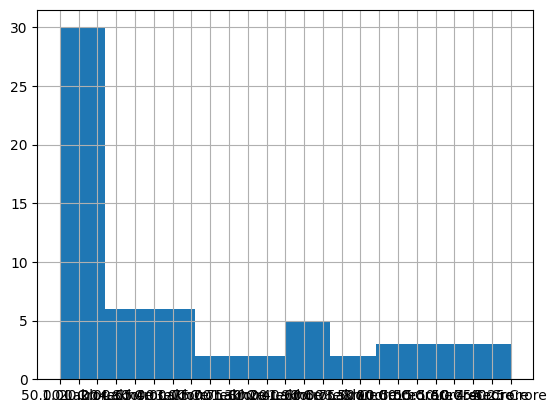

In [28]:
import matplotlib.pyplot as plt

df['Final Price'].hist()
plt.show()


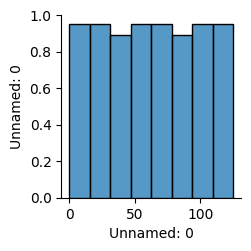

In [29]:
import seaborn as sns

sns.pairplot(df)
plt.show()


T-statistic: nan
P-value: nan


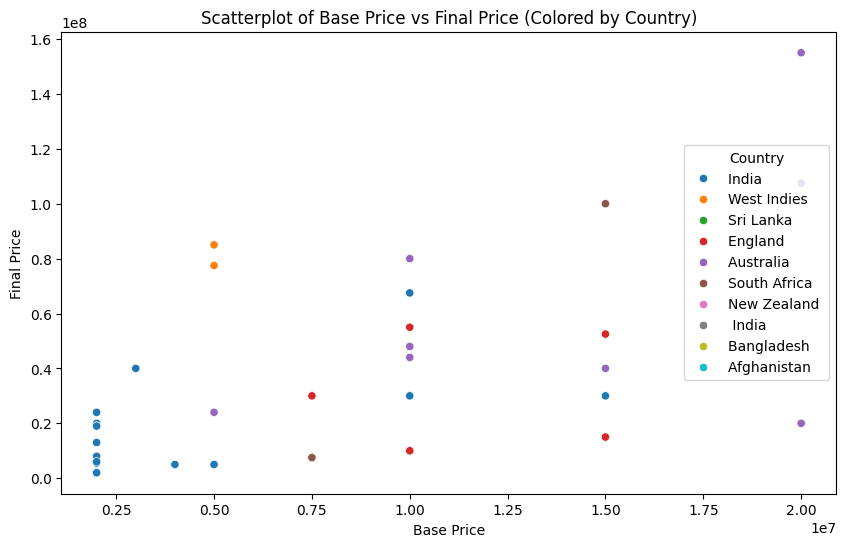

In [46]:
# Step 7: Feature Engineering

# Convert 'Base Price' and 'Final Price' columns to string type
df['Base Price'] = df['Base Price'].astype(str)
df['Final Price'] = df['Final Price'].astype(str)

# Replace 'Crore' and 'Lakh' with scientific notation and convert to float
df['Base Price'] = df['Base Price'].str.replace(' Crore', 'e7').str.replace(' Lakh', 'e5').astype(float)
df['Final Price'] = df['Final Price'].str.replace(' Crore', 'e7').str.replace(' Lakh', 'e5').astype(float)

# Calculate difference between Final Price and Base Price as a new feature 'Price Difference'
df['Price Difference'] = df['Final Price'] - df['Base Price']

# Extract playing country from 'Role' column and create a new feature 'Country'
df['Country'] = df['Role'].apply(lambda x: x.split(' • ')[-1])

# Step 8: Advanced Analysis

# Hypothesis Testing: Test if there is a significant difference in price between Indian and overseas players
from scipy.stats import ttest_ind

indian_prices = df[df['Country'] == 'India']['Final Price'].dropna()
overseas_prices = df[df['Country'] != 'India']['Final Price'].dropna()

t_stat, p_value = ttest_ind(indian_prices, overseas_prices)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Data Visualization: Scatter plot of Base Price vs Final Price colored by playing country
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base Price', y='Final Price', hue='Country', data=df)
plt.xlabel('Base Price')
plt.ylabel('Final Price')
plt.title('Scatterplot of Base Price vs Final Price (Colored by Country)')
plt.show()

